<center><h1>Generalized Linear Models in R</h1></center>
<center><h3>Ellen Duong</h3></center>
<center><h3>Paul Stey</h3></center>
<center><h3>2023-11-09</h3></center>

# 1. Generalized Linear Models

  - Family of models _including_ linear models
  - Generalization of linear models to included categorical and/or non-normaly distributed dependent/outcome variable
  - Examples:
    + Binomial logistic regression
    + Multinomial regression
    + Poisson regression

 ## 1.1 Note on Terminology
  - General Linear Model $\ne$ General**ized** Linear Model

  - General linear model refers to models with a continuous outcome variable, and assumption of normality
    + ANOVA (and friends)
    + Linear regression

  - Term General**ized** Linear Model used to refer to a family of models for categorical and/or non-normally distributed outcome variables 
      

# 2 Binomial Logistic Regression

  - Linear regression assumes a continuous outcome variable

  - If the outcome variable is _not_ continuous, we probably want a different approach. 
        
  - In the case of a binary outcome variable, we model $\text{Pr}(y_i = 1)$


## 2.1 Logistic Regression vs. Linear Regression
    
Differences from linear regression:
  - Assumes outcome is bounded by $0$ and $1$
    + that is $0 \le E(y_i) = \pi_i \le 1$
  - Variance of $y$ is _not_ constant (i.e., not the same for all $y_i$)
  - Similarly, variance of $\varepsilon$ is not constant
  - Computational differences (i.e., closed-form vs numerical methods)


## 2.2 Components of Generalized Linear Models
Recall the form of the linear model:
        
$$ y = \beta_0 + \beta_1 x_1 + ... + \beta_p x_p + \varepsilon $$ 
        

which can also be written in matrix notation as
        
$$\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\varepsilon} $$
        
where $\mathbf{X} \boldsymbol{\beta}$ is the systemic component and $\boldsymbol{\varepsilon}$ is the random component.


### 2.2.1 Components of Generalized Linear Model (cont.)

Form of GLM:
$$g(\mu) = \mathbf{X} \boldsymbol{\beta}$$

Generalized linear models have 3 components:
1. Systemic component
  - Same as linear regression (e.g., $\mathbf{X} \boldsymbol{\beta}$)
2. Response distribution assumption
  - Random component of the model
  - Specifies the probabilistic mechanism by which responses were generated
3. Link function
  - This is $g(\cdot)$ in equation above


### 2.2.2 The Link Function

Link function is a characteristic feature of generalized linear models

A link function:
1. Connects the systemic component to response (i.e., "links" them) 
 - Allows us to map a linear function with range $\left( - \infty, \infty \right)$ to some new range; e.g., $\left(0, 1\right)$
2. Differs according to the species of GLM in question (and even within)
3. Similar to "activation functions" in artificial neural networks


### 2.2.3 Binomial Logistic Regression
Logistic regression with a single predictor:

\begin{equation*}
\begin{split}
\pi(x_1) & = \frac{\exp{(\beta_0 + \beta_1 x_1 )}}{1 + \exp{(\beta_0 + \beta_1 x_1 )}} \\
& \\
& = \frac{1}{1 + \exp{(- \eta )}}
\end{split}
\end{equation*}
where $\eta = \beta_0 + \beta_1 x_1$

### 2.2.4 Binomial Logistic Regression
$$ \pi(x_1) = \frac{\exp{(\beta_0 + \beta_1 x_1 )}}{1 + \exp{(\beta_0 + \beta_1 x_1 )}} $$


Note that the $ \beta_0 + \beta_1 x_1 $ in the above equation is the same as we saw in linear regression. This is called the _linear predictor_ in logistic regression

### 2.2.5 Interpreting Parameter Estimates
Interpretation of logistic regression parameter estimates:


1. Slightly different than linear regression
2. Recall our model is $\text{Pr}\left(y_i = 1\right) = \text{logit}^{-1}\left(\mathbf{X} \boldsymbol{\beta}\right)$
3. Regression parameters estimates are on logit scale (log odds), 
  - It's common to exponentiate $\widehat{\boldsymbol{\beta}}$ (the estimated or predicted values of the coefficients)
  - Value of $\text{exp}\left(\beta_j\right)$ is the odds ratio of 1-unit increase on $x_j$

### 2.2.6 Model Evaluation

1. Recall that $R^2$ in linear regression gives us a nice method of evaluating models (i.e., proportion of variance explained). 
2. However, in logistic regression, there is no direct analogue to $R^2$ (but there are some similar measure)
3. Thus, we tend to rely on the information-based criteria discussed previously (e.g., AIC, BIC)
  - These also have the advantage of penalizing unnecessary model complexity

### 2.2.7 Choice of Link Function
Several link function options for modeling binomial data:

1. Logit link (most common, by far)
2. CDF of normal distribution (probit regression)
3. CDF of $t$-distribution (_robit_ model; robust binomial regression)
  - Degrees of freedom parameter allows for flexibility in accommodating outliers

### 2.2.8 When to use Logistic Regression

  - Used when outcome variable takes one of two values (e.g., $0$ or $1$, "lived" or "died") 
  - Similar structure as linear regression 

    + Estimate effects of predictors on outcome
    + Can have one or many predictors

  - Can answer similar kinds of questions as linear regression, for example:
    + _What is the effect of the predictor, $x$, on the outcome $y$?_

## 2.3 Single-Variable Logistic Regression in R

  - Suppose we are interested in the survival of passengers on the Titanic. 
  - In particular, suppose we want to know whether a passenger's gender impacted whether or not they survived.
  - We can investigate this using logistic regression.

In [2]:
library(broom)

titanic_df <- read.csv("data/titanic_subset.csv")

head(titanic_df)

,passenger_id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


### 2.3.1 Fitting the Model
- Generalized linear models are fitted using `glm()` function

In [3]:
fm1 <- glm(survived ~ sex, titanic_df, family = binomial(link = "logit"))

In [4]:
tidy(fm1)           # show table of regression parameter estimates

glance(fm1)         # show fit indices

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.056589,0.1289864,8.191477,2.580394e-16
sexmale,-2.513710,0.1671782,-15.036107,4.258662e-51


null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1186.655,890,-458.902,921.8039,931.3886,917.8039,889,891


### 2.3.2 Using Fitted Model to Make Predictions

- We can use fitted model object (e.g., `fm1`) to make predictions for new data
- Use the `predict()` function

In [5]:
data.frame(sex = "male")

sex
<chr>
male


In [6]:
predict(fm1, newdata = data.frame(sex = "male"), type = "response")

1 
0.1889081

## 3. Why do we Need Logistic Regression?

In [7]:
fm1b <- lm(survived ~ sex, titanic_df)

In [8]:
tidy(fm1)
tidy(fm1b)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.056589,0.1289864,8.191477,2.580394e-16
sexmale,-2.513710,0.1671782,-15.036107,4.258662e-51


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.7420382,0.02306578,32.17052,3.349895e-151
sexmale,-0.5531301,0.02866283,-19.29782,1.406066e-69


## 3.1 Simulated Data Example

In [9]:
n <- 1500                           # set sample size
beta0 <- 1.2                        # specify regression parameters
beta1 <- -0.7

x <- rnorm(n)           

invlogit <- function(eta) {         # Define a function to compute the inverse logit. 
    res <- 1/(1 + exp(-eta))        # Recall this is our link function.
    return(res)
}

pr  <- invlogit(beta0 + beta1*x)
y   <- rbinom(n, 1, pr)
dat <- data.frame(y, x)

lm1 <- lm(y ~ x, dat)               # Fit a linear model and a binomial logistic model

glm1 <- glm(y ~ x, dat, family = binomial(link = "logit"))

### 3.1.1 Comparing our Linear Model and Bionomial Logistic Model

 - Compare linear regression to logistic 
 - Logistic does better job of recovering betas (i.e., `1.2` and `-0.7`)

In [10]:
tidy(lm1)

tidy(glm1)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.75953899,0.01084669,70.02495,0.000000e+00
x,-0.09875403,0.01106330,-8.92627,1.258042e-18


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.2263727,0.06486081,18.907761,9.844907e-80
x,-0.5654288,0.06662981,-8.486124,2.136433e-17



# 4. Multivariate Binomial Logistic Regression

Suppose now we want to investigate the effect of both sex and age on survival. We use the model below. 

In [11]:
fm2 <- glm(survived ~ sex + age, titanic_df, family = binomial(link = "logit")) 

In [12]:
tidy(fm2)

glance(fm2)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.2772732,0.230168800,5.5492891,2.868335e-08
sexmale,-2.4659202,0.185383505,-13.3017237,2.261930e-40
age,-0.0054259,0.006309915,-0.8599006,3.898438e-01


null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
964.516,713,-374.9785,755.9569,769.6696,749.9569,711,714


In [13]:
predict(fm2, newdata = data.frame(sex = "male", age = 10), type = "response")

1 
0.2239306

<center><h1>Poisson Regression Models in R</h1></center>

# 5. Poisson Regression

1. Form of Poisson model for single predictor

$$ \text{log}(\mu) = \beta_0 + \beta_1 x_1 $$ 

2. Link function is $\text{log}(\cdot)$

3. We use Poisson regression when we model count data   % (e.g., $y_i \in \{0, 1, 2, \dots \}$)
  - Number of offspring an individual has
  -  Number bacterial colonies in Petri dish
4. As we saw with logistic regression, we _could_ use a linear model instead. but our parameter estimates would be biased, and our model inaccurate

## 5.1 Poisson Distribution
<center>
<img src=images/poisson_dist.png width = "860">
</center>


## 5.2 Poisson Regression

1. As with linear and logistic regression, we can use Poisson regression to estimate effects of predictors on some outcome

2. We can also use fitted Poisson regression models to predict future values of some outcome variable given known values for the covariates

3. Frequently used for modeling rare events

### 5.2.1 Assumptions of Poisson Regression
1. Log-transformed outcomes are linearly related to predictors 
2. Observations are independent 
3. Distributional assumption:  $y_i | x_i \sim \text{Poisson}(\lambda_i)$

### 5.2.2 Assumptions of Poisson Regression (cont.)

 - Note that the assumption $y_i | x_i \sim \text{Poisson}(\lambda_i)$ has some important implications.

 - The Poisson distribution has a single parameter, $\lambda$, which is both its mean and variance. 

 - It is frequently the case we will have data where the variance greatly exceeds the mean. When this happens, it is wise to consider similar alternatives to the Poisson model    

### 5.2.3 Similar Alternatives to Poisson Models
1. Quasi-Poisson regression
2. Zero-inflated Poisson regression
3. Negative Binomial regression

### 5.2.4 Evaluation of Poisson Regression Models

 - As with logistic regression, there is no direct counterpart to the $R^2$ in linear regression

 - Poisson regression models can be compared using AIC and BIC as we saw with linear and logistic regression

### 5.2.5 Interpreting Poisson Regression Parameters
 - We can exponentiate Poisson regression parameter estimates, and then treat them multiplicative effects

# 6. Poisson Model for Number of Procedures

Suppose we want to model the number of procedure for diabetes patients admitted to the hospital. We use several Poisson models below.

In [14]:
dia_df <- read.csv("data/diabetes_data_clean.csv")


dim(dia_df)        # dimensions of dataframe (i.e., number of rows and columns)
names(dia_df)      # get column names

[1] 101766     50

[1] "encounter_id"             "patient_nbr"             
 [3] "race"                     "gender"                  
 [5] "age"                      "weight"                  
 [7] "admission_type"           "discharge_disposition"   
 [9] "admission_source"         "time_in_hospital"        
[11] "payer_code"               "medical_specialty"       
[13] "num_lab_procedures"       "num_procedures"          
[15] "num_medications"          "number_outpatient"       
[17] "number_emergency"         "number_inpatient"        
[19] "diag_1"                   "diag_2"                  
[21] "diag_3"                   "number_diagnoses"        
[23] "max_glu_serum"            "A1Cresult"               
[25] "metformin"                "repaglinide"             
[27] "nateglinide"              "chlorpropamide"          
[29] "glimepiride"              "acetohexamide"           
[31] "glipizide"                "glyburide"               
[33] "tolbutamide"              "pioglitazone"            
[35] "rosiglitazone"            "acarbose"                
[37] "miglitol"                 "troglitazone"            
[39] "tolazamide"               "examide"                 
[41] "citoglipton"              "insulin"                 
[43] "glyburide_metformin"      "glipizide_metformin"     
[45] "glimepiride_pioglitazone" "metformin_rosiglitazone" 
[47] "metformin_pioglitazone"   "change"                  
[49] "diabetesMed"              "readmitted"

## 6.1 Checking Mean and Variance

- Recall the assumptions of Poisson models

In [15]:
mean(dia_df$num_procedures)
var(dia_df$num_procedures)

[1] 1.33973

[1] 2.909777

## 6.2 Fitting Poisson Regression Model

- As with binomial logistic regression, we use `glm()` function

In [16]:
fm5 <- glm(num_procedures ~ number_diagnoses, dia_df, family = poisson(link = "log"))

In [17]:
tidy(fm5)

glance(fm5)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.08877153,0.01146249,-7.744526,9.593902e-15
number_diagnoses,0.05073237,0.00146474,34.635746,7.322312e-263


null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
220167.2,101765,-182193.9,364391.7,364410.8,218930.4,101764,101766


### 6.2.1 Plotting our Model's Variables


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




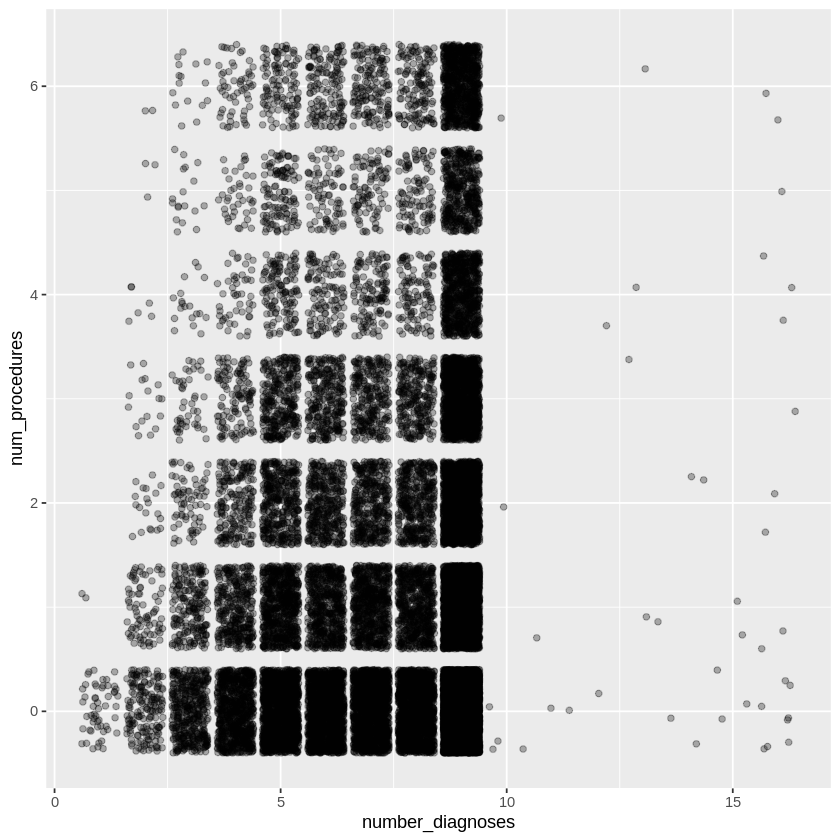

In [18]:
library(dplyr)
library(ggplot2)


df_dia_subset <- sample_frac(dia_df, 0.3)

ggplot(df_dia_subset, aes(x = number_diagnoses, y = num_procedures)) +
    geom_jitter(alpha = 0.3)

## 6.3 Adding Predictor Variables

- Like linear and logistic regression, we can add arbitrary number of predictors

In [19]:
fm6 <- glm(num_procedures ~ number_diagnoses + num_medications + time_in_hospital, 
           dia_df, 
           family = poisson(link = "log"))

In [20]:
tidy(fm6)
glance(fm6)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.492862068,0.0117377906,-41.989339,0.000000e+00
number_diagnoses,-0.005352674,0.0015156775,-3.531539,4.131496e-04
num_medications,0.043342655,0.0002880113,150.489398,0.000000e+00
time_in_hospital,0.011259141,0.0009644126,11.674610,1.718523e-31


null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
220167.2,101765,-169299.7,338607.3,338645.4,193142,101762,101766


### 6.3.1 Plotting our Variables

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


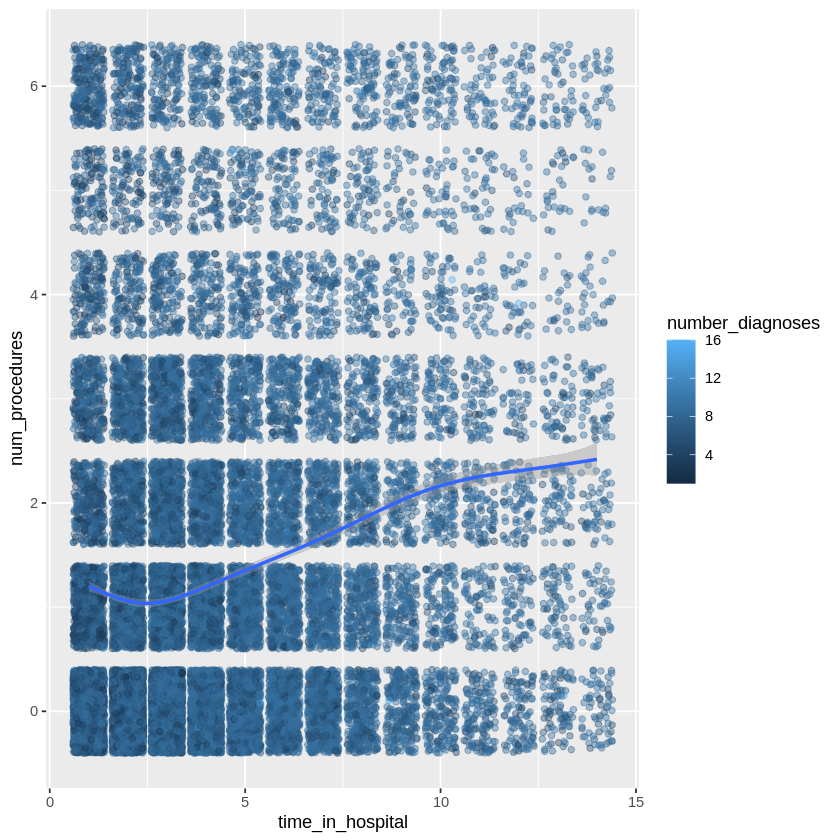

In [21]:
ggplot(df_dia_subset, aes(x = time_in_hospital, y = num_procedures, colour = number_diagnoses)) +
    geom_jitter(alpha = 0.4) + 
    geom_smooth()

<center><h1>GLMs with Interaction Effects in R</h1></center>

# 7. Interaction Effects

- Often called "moderation", or statistical moderation effects
- One variable "behaves" differently depending on the level another
- E.g. cigarette smoking is an _increasingly strong_ predictor of lung cancer as age increases


# 8. Logistic Regression with Interaction Effect

- Using `titanic` data 
- Predicting survival using age and sex

In [22]:
titanic_df <- read.csv("data/titanic_subset.csv")

head(titanic_df)

,passenger_id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


## 8.1 Fitting Model with Interaction Term

In [23]:
fm3 <- glm(survived ~ sex + age + age*sex, titanic_df, family = binomial(link = "logit"))

tidy(fm3)
glance(fm3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.59380093,0.31032443,1.913484,0.055686078
sexmale,-1.31775110,0.40842445,-3.226426,0.001253468
age,0.01970198,0.01057286,1.863449,0.062399191
sexmale:age,-0.04111845,0.01355105,-3.034336,0.002410658


null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
964.516,713,-370.2017,748.4034,766.687,740.4034,710,714


### 8.1.1 Plotting the Effects

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 177 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 177 rows containing missing values (`geom_point()`).”


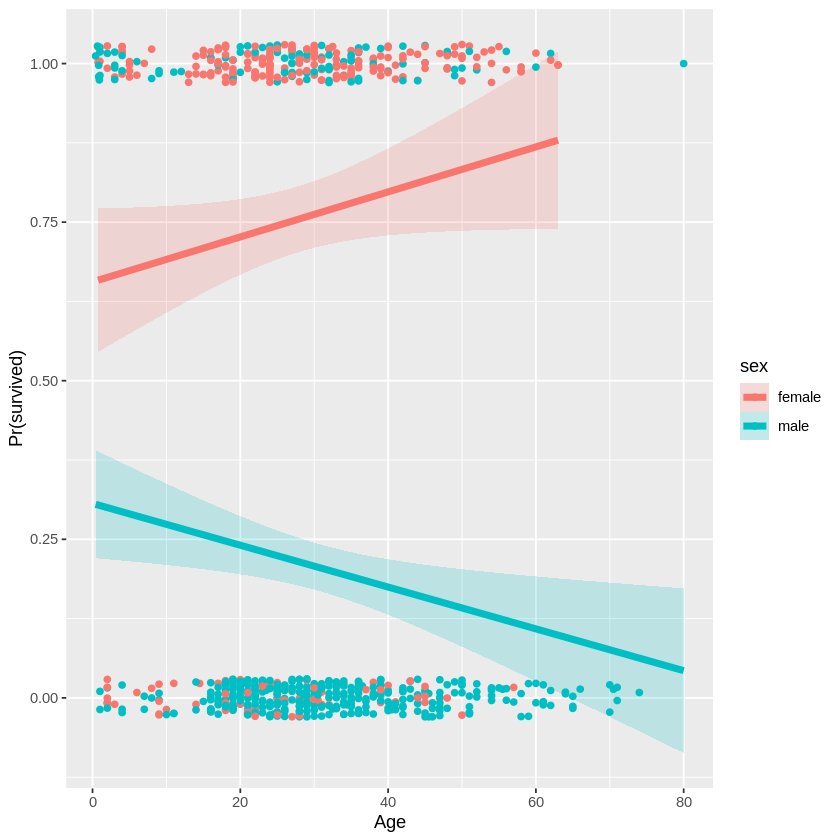

In [24]:
ggplot(titanic_df, aes(x = age, y = as.numeric(survived), color = sex)) +
    stat_smooth(method = "glm", alpha = 0.2, size = 2, aes(fill = sex)) +
    geom_point(position=position_jitter(height = 0.03, width = 0)) +
    xlab("Age") + 
    ylab("Pr(survived)")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: fill,
colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


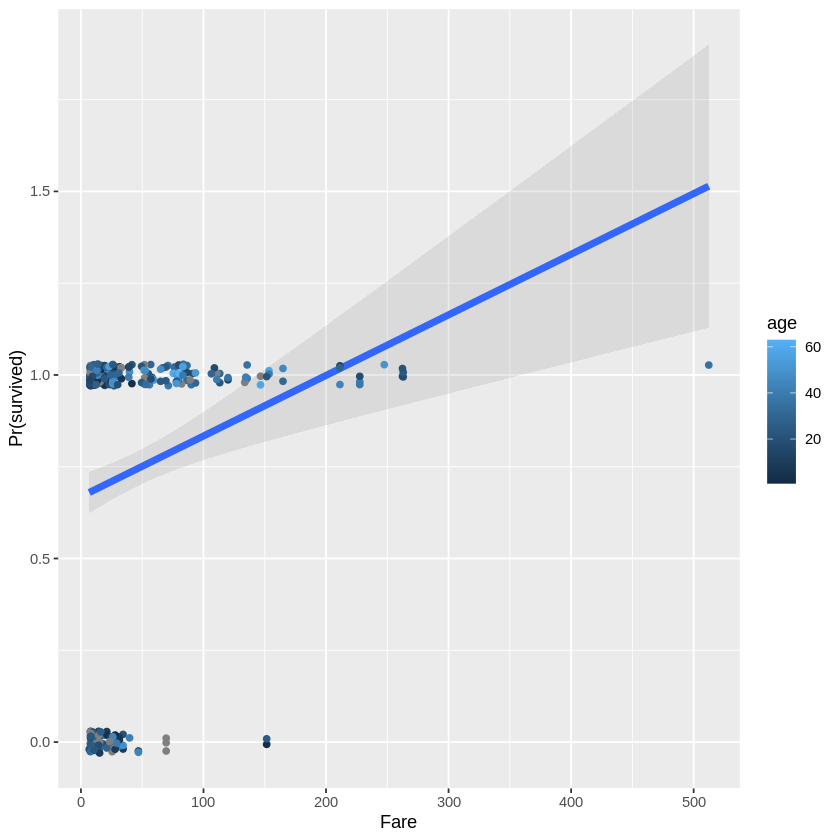

In [25]:
ggplot(titanic_df %>% filter(sex == "female"), aes(x = fare, y = as.numeric(survived), color = age)) +
    stat_smooth(method = "glm", alpha = 0.2, size = 2, aes(fill = age)) +
    geom_point(position=position_jitter(height = 0.03, width = 0)) +
    xlab("Fare") + 
    ylab("Pr(survived)")

### 8.1.2 Predictions using Fitted Model

In [26]:
fm2 <- glm(survived ~ age + sex + age*sex, titanic_df, family = binomial(link = "logit"))

predict(fm2, newdata=data.frame(age = 50, sex = "female"), type = "response")

1 
0.8290487

In [27]:
str(titanic_df)

'data.frame':	891 obs. of  12 variables:
 $ passenger_id: int  1 2 3 4 5 6 7 8 9 10 ...
 $ survived    : int  0 1 1 1 0 0 0 0 1 1 ...
 $ pclass      : int  3 1 3 1 3 3 1 3 3 2 ...
 $ name        : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ sex         : chr  "male" "female" "female" "female" ...
 $ age         : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ sibsp       : int  1 1 0 1 0 0 0 3 0 1 ...
 $ parch       : int  0 0 0 0 0 0 0 1 2 0 ...
 $ ticket      : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ fare        : num  7.25 71.28 7.92 53.1 8.05 ...
 $ cabin       : chr  "" "C85" "" "C123" ...
 $ embarked    : chr  "S" "C" "S" "S" ...
